In [1]:
##import packages
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

import pandas as pd

In [4]:
Sea_ice = xr.open_dataset('https://thredds.met.no/thredds/dodsC/osisaf/met.no/reprocessed/ice/conc_v2p0_sh_agg')
Sea_ice

<xarray.Dataset>
Dimensions:                   (nv: 2, time: 11801, xc: 432, yc: 432)
Coordinates:
  * xc                        (xc) float64 -5.388e+03 -5.362e+03 ... 5.388e+03
  * yc                        (yc) float64 5.388e+03 5.362e+03 ... -5.388e+03
  * time                      (time) datetime64[ns] 1979-01-02T12:00:00 ... 2015-12-31T12:00:00
    lat                       (yc, xc) float32 ...
    lon                       (yc, xc) float32 ...
Dimensions without coordinates: nv
Data variables:
    Lambert_Azimuthal_Grid    int32 ...
    time_bnds                 (time, nv) datetime64[ns] ...
    ice_conc                  (time, yc, xc) float64 ...
    raw_ice_conc_values       (time, yc, xc) float64 ...
    total_standard_error      (time, yc, xc) float64 ...
    smearing_standard_error   (time, yc, xc) float64 ...
    algorithm_standard_error  (time, yc, xc) float64 ...
    status_flag               (time, yc, xc) float32 ...
Attributes:
    title:                     Sea Ice Concentration Climate Data Record from...
    summary:                   This climate data record of sea ice concentrat...
    topiccategory:             Oceans ClimatologyMeteorologyAtmosphere
    keywords:                  Earth Science > Cryosphere > Sea Ice > Sea Ice...
    keywords_vocabulary:       GCMD Science Keywords
    geospatial_lat_min:        -90.0
    geospatial_lat_max:        -16.62393
    geospatial_lon_min:        -180.0
    geospatial_lon_max:        180.0
    geospatial_vertical_min:   0.0
    geospatial_vertical_max:   0.0
    sensor:                    SMMR,SSM/I,SSMIS
    platform:                  Nimbus-7,DMSP-F<08,10,11,13,14,15>,DMSP-F<16,1...
    source:                    FCDR of SMMR / SSMI / SSMIS Brightness Tempera...
    time_coverage_start:       2015-12-30T00:00:00Z
    time_coverage_end:         2015-12-31T00:00:00Z
    time_coverage_duration:    P1D
    time_coverage_resolution:  P1D
    project:                   OSI SAF - EUMETSAT
    institution:               OSISAF - EUMETSAT
    creator_name:              OSISAF - EUMETSAT
    creator_type:              institution
    creator_url:               http://www.osi-saf.org
    creator_email:             osi-saf.helpdesk@meteo.fr
    license:                   All intellectual property rights of the Ocean ...
    references:                Product User Manual v1p0 (Dec 2016),Algorithm ...
    history:                   2017-02-14T19:51:42Z creation
    date_created:              2017-02-14
    cdm_data_type:             Grid
    spatial_resolution:        25.0 km grid spacing
    algorithm:                 SICCI2LF (19V, 37V, 37H)
    geospatial_bounds_crs:     EPSG:6930
    contributor_name:          Leif Toudal Pedersen, Gorm Dybkjaer, Steinar E...
    contributor_role:          PrincipalInvestigator,author,author,author,aut...
    tracking_id:               7c3ce3b2-7ea0-48ca-9fb5-c81e322eb95d
    naming_authority:          int.eumetsat
    Conventions:               CF-1.6 ACDD-1.3
    standard_name_vocabulary:  CF Standard Name Table (v36, 21 September 2016)
    id:                        10.15770/EUM_SAF_OSI_0008
    product_version:           2.0

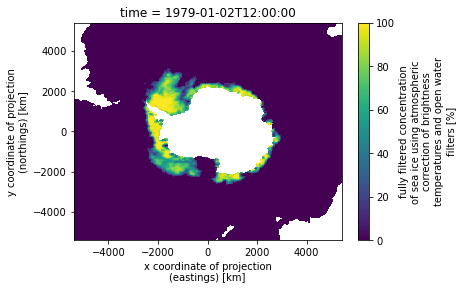

In [6]:
Sea_ice.sel(time = slice('2010','1979-01-02T12:00:00.000000000').plot()

In [10]:
Sea_ice_Elise = Sea_ice.sel(time = slice('2010','2016'))
Sea_ice_Elise.to_netcdf('../../UNSEEN-trends_play/Elise_sea_ice.nc')

In [ ]:
mapproj = ccrs.LambertConformal(central_longitude=20.0,
                                central_latitude=65.0,
                                false_easting=0.0,
                                false_northing=0.0,
                                secant_latitudes=None,
                                standard_parallels=None,
                                globe=None,
                                cutoff=-30)

ax = plt.axes(projection=mapproj)

SEAS5_q200['P_200'].plot(transform=ccrs.PlateCarree(),
#                          robust=True,
                         cmap=plt.cm.Blues,
                         ax=ax)

ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=False,
                  linewidth=1,
                  color='gray',
                  alpha=0.5,
                  linestyle='--')
gl.ylocator = mticker.FixedLocator([35, 45, 55, 65])

# ax.set_title('February 2020')

